In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mapping import map_str_values
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

- Đọc dữ liệu

In [7]:
X_train = pd.read_csv("data/train_values.csv", index_col="building_id")
Y_train = pd.read_csv("data/train_labels.csv", index_col="building_id")

- Chuyển biến phân loại về dạng int để có thể áp dụng PCA

In [8]:
mapped_X = map_str_values(X_train)

- Ma trận tương quan

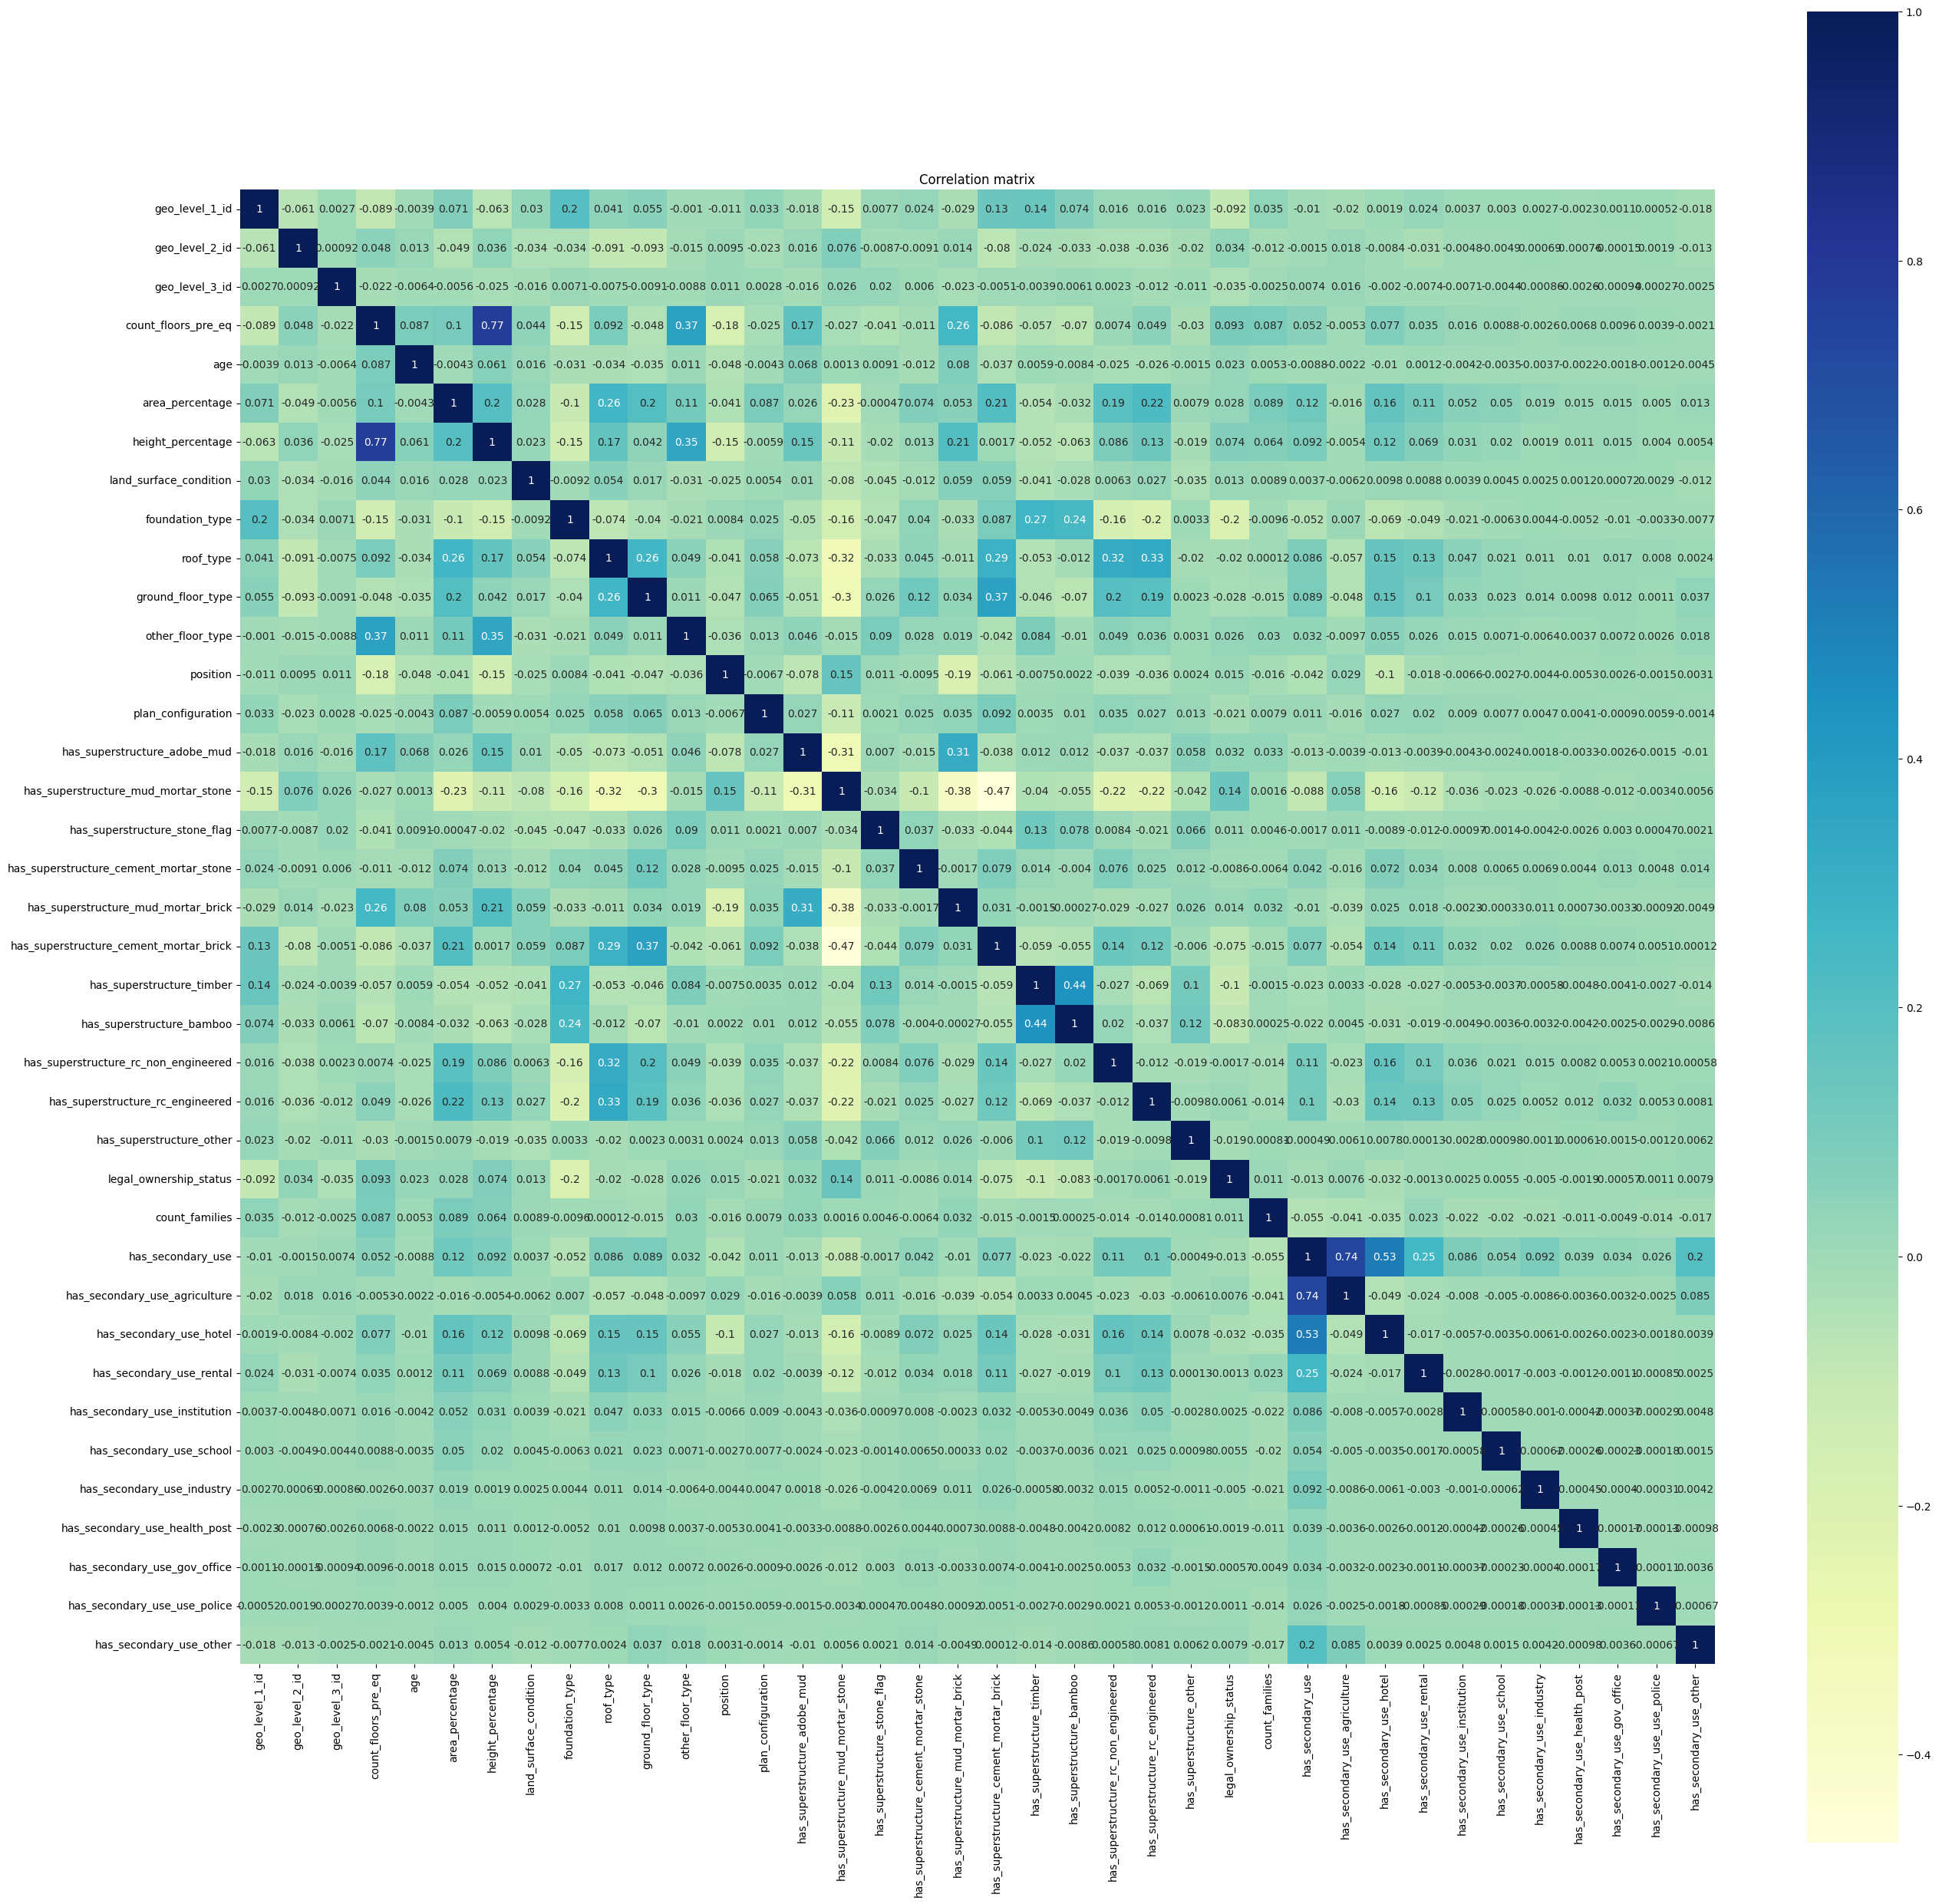

In [24]:
X_corr = X_train.corr()

plt.figure(figsize=(31, 31))
sns.heatmap(X_corr, vmax=1,cmap="YlGnBu", square=True, annot=True)
plt.title('Correlation matrix')
plt.show()

- Scale bộ data theo MinMaxScaler

In [10]:
scaler = MinMaxScaler()
mapped_X = scaler.fit_transform(mapped_X)


In [11]:
pca = PCA(n_components=3, random_state=192)
X0 = pca.fit_transform(mapped_X)
X0.shape

(260601, 3)

In [28]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([3.07254322, 2.30204778, 1.97600073, 1.81272532, 1.4545865 ,
        1.1941362 , 1.1096167 , 1.07404694, 1.03688095, 1.02089178,
        1.01053642, 1.0054549 , 1.003441  , 1.00200356, 1.00097342,
        0.99819906, 0.99341317, 0.99007586, 0.98181954, 0.96312399,
        0.95272623, 0.9420219 , 0.93014953, 0.91582291, 0.895374  ,
        0.88461753, 0.85022431, 0.82181523, 0.72344197, 0.69191651,
        0.68606835, 0.62525164, 0.56841949, 0.53675957, 0.47836043,
        0.27984838, 0.20863803, 0.00602695]),
 array([[-3.88829484e-02, -2.18266500e-01, -1.60805281e-01, ...,
         -1.63894470e-02,  2.50511503e-04,  1.18237423e-03],
        [ 5.98266071e-02,  1.25483540e-01,  4.43963908e-02, ...,
          1.53513284e-03, -2.30684010e-03, -4.71829412e-04],
        [ 2.02862451e-02, -2.34515239e-02,  2.72484291e-02, ...,
          1.33504055e-02,  2.37553442e-03,  1.33288734e-04],
        ...,
        [-2.14943484e-02, -6.14131466e-04,  1.83164463e-02, ...,
         -7.79221917e-

Text(0.5, 0, 'Dimensions')

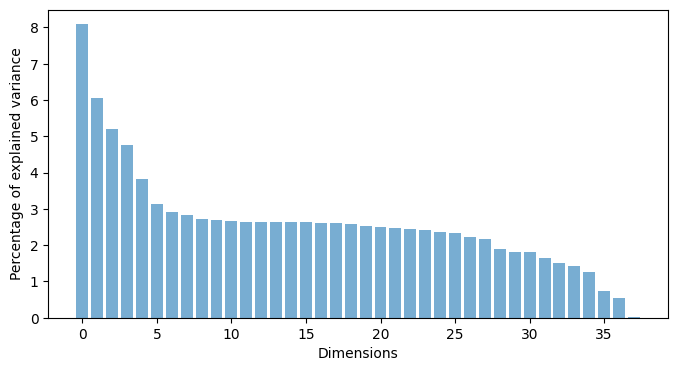

In [30]:

explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(X_train.shape[1]), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

Tạo color map

In [12]:
color_map = {
    1:"red",
    2:"green",
    3:"blue"
}

colors = Y_train["damage_grade"].map(color_map)

In [13]:
pc1 = X0[:, 0]
pc2 = X0[:, 1]
pc3 = X0[:, 2]

<Figure size 640x480 with 0 Axes>

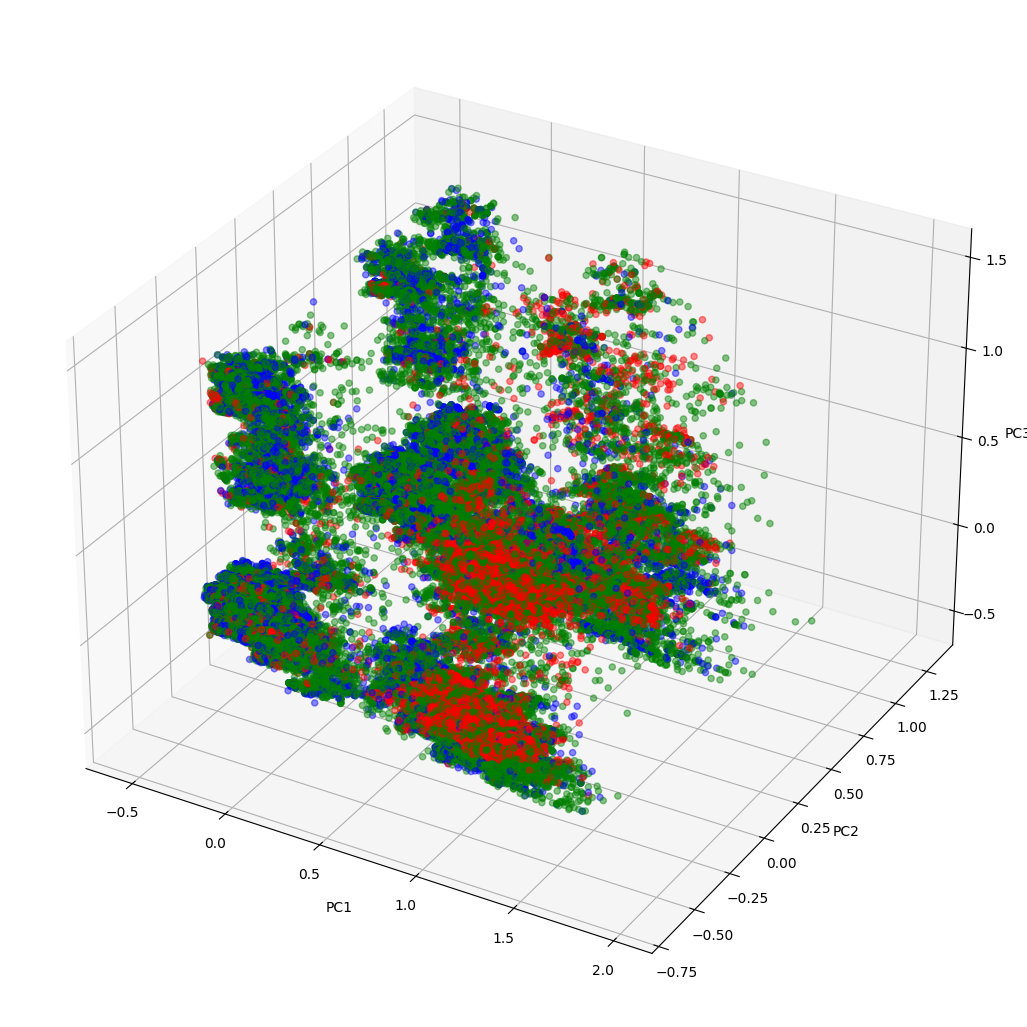

In [14]:
fig = plt.figure()
fig = plt.figure(figsize=(13, 14))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pc1, pc2, pc3, c=colors, marker="o", alpha=0.45)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


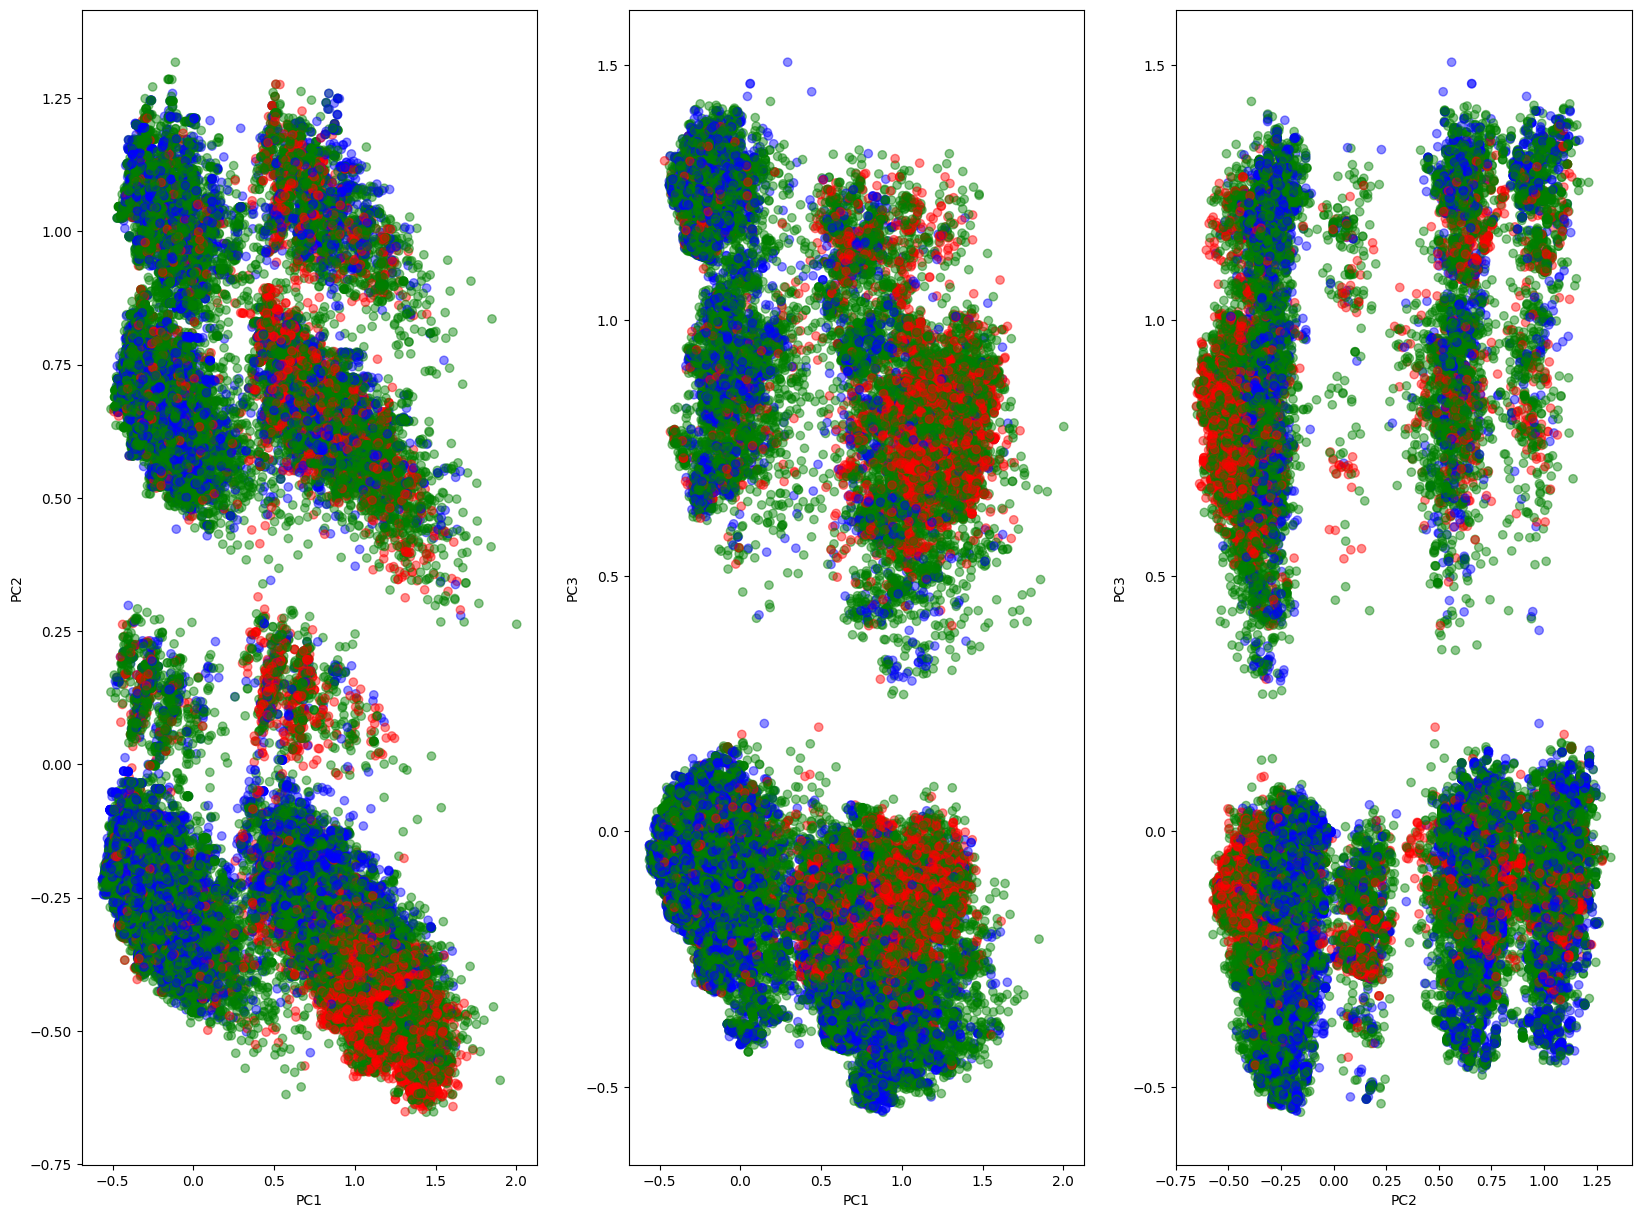

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 15))
# fig.figure()
axes[0].scatter(pc1, pc2, c=colors, alpha = 0.45)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

axes[1].scatter(pc1, pc3, c=colors, alpha =0.45)
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC3")

axes[2].scatter(pc2, pc3, c=colors, alpha =0.45)
axes[2].set_xlabel("PC2")
axes[2].set_ylabel("PC3")
plt.show()

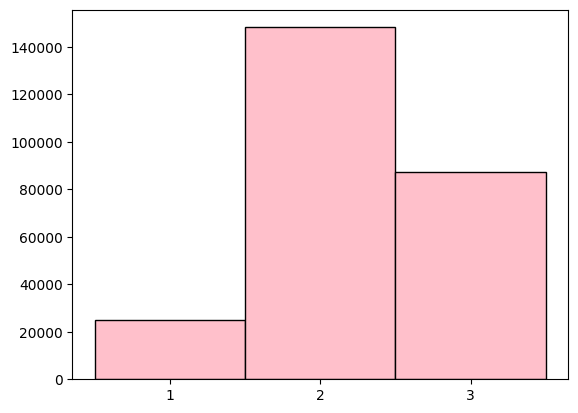

In [16]:
bin_edges = np.arange(np.floor(Y_train["damage_grade"].min()) - 0.5, np.ceil(Y_train["damage_grade"].max()) + 1.5)
plt.hist(Y_train, bins=bin_edges, edgecolor="black", color="pink")
plt.xticks(np.arange(np.floor(Y_train["damage_grade"].min()), np.ceil(Y_train["damage_grade"].max()) + 1, 1))
plt.show()